<a href="https://colab.research.google.com/github/Eslam-elnahas/My-Project-/blob/main/App_Code_Predection_Base_Gradio_UI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install -U segmentation-models

In [43]:
!pip install gradio

In [44]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
import gradio as gr

In [45]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

In [46]:
from keras import backend as K

In [47]:
from keras.models import load_model

In [48]:
def Jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [49]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)




In [50]:
satellite_model = load_model('/content/satellite_segmentation_full.h5',
                          custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                           'Jaccard_coef': Jaccard_coef})

In [51]:
# satellite_model.get_config()


In [80]:
image = Image.open('/content/PH_2.png')
image = image.resize((256,256))
image = image.convert('RGB')
image = np.array(image)
image = np.expand_dims(image, 0)

In [81]:
prediction = satellite_model.predict(image)


1/1 [==============================] - 0s 69ms/step


In [82]:

predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

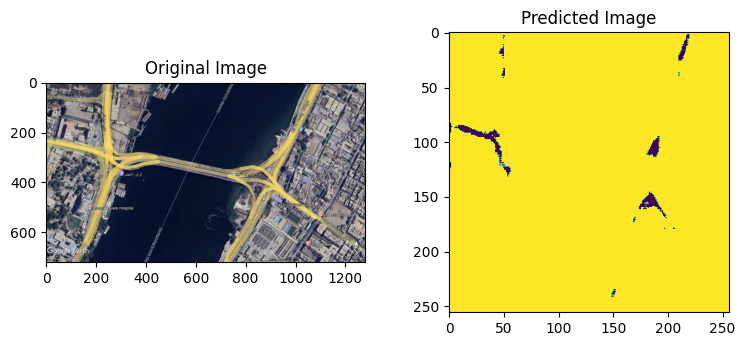

In [83]:

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('/content/PH_2.png'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [75]:
def process_input_image(image_source):
  # image = image_source
  # image = Image.fromarray(image_source)
  # image = image.resize((256,256))      # يستخدم هذا الكود لتحويل حجم الصورة الي 256 * 256 اولا قبل البد وعند تحميل الصورة في واجهه المستخدم  ا
  # image = image.convert('RGB')
  # image = np.array(image)
  image = np.expand_dims(image_source, 0)

  prediction = satellite_model.predict(image)
  predicted_image = np.argmax(prediction, axis=3)

  predicted_image = predicted_image[0,:,:]
  predicted_image = predicted_image * 50
  print(predicted_image)
  return 'Predicted Masked Image', predicted_image

In [76]:
my_app=gr.Blocks()

In [77]:
with my_app:
  gr.Markdown("Statellite Image Segmentation Application UI with Gradio")
  with gr.Tabs():
    with gr.TabItem("Select your image"):
      with gr.Row():
        with gr.Column():
            img_source = gr.Image(label="Please select source Image", width=256, height=256)
            source_image_loader = gr.Button("Load above Image")
        with gr.Column():
            output_label = gr.Label(label="Image Info")
            img_output = gr.Image(label="Image Output")
    source_image_loader.click(
        process_input_image,
        [
            img_source
        ],
        [
            output_label,
            img_output
        ]
    )

In [78]:
my_app.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://e56cd9ff93ef33dbc4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 244ms/step
[[150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]
 ...
 [150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]
 [150 150 150 ... 150 150 150]]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://e56cd9ff93ef33dbc4.gradio.live


In [79]:
my_app.close()


Closing server running on port: 7861
